# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: I Bagus Putu Swardanasuta
- Email: agusswardana123@gmail.com / a406ybm207@devacademy.id
- Id Dicoding: agusswardanaa

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

### Data Loading

In [2]:
dataset = pd.read_csv("data/data.csv", sep=";")
dataset

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


### Dataset Information

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

**Insight:**  
Dataset terdiri dari 4.424 record dan 36 kolom.

### Ringkasan Statistik

In [4]:
dataset.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


**Insight:**  
- Fitur numerik memiliki distribusi besaran yang berbeda. Ada fitur yang bernilai hingga ribuan dan ada fitur yang hanya bernilai satuan.
- Berdasarkan nilai min dan max, tidak ada fitur yang memiliki nilai terlalu ekstrem.

### Pengecekan Missing Value

In [5]:
dataset.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


**Insight:**  
Tidak terdapat missing value pada dataset.

### Pengecekan Duplikasi Data

In [6]:
print(f"Jumlah duplikasi data: {dataset.duplicated().sum()}")

Jumlah duplikasi data: 0


**Insight:**  
Tidak terdapat record duplikat pada dataset.

#### Pendefinisian Fitur Numerik

In [7]:
numerical_features = ["Previous_qualification_grade", "Admission_grade", "Age_at_enrollment", "Curricular_units_1st_sem_credited", "Curricular_units_1st_sem_enrolled", "Curricular_units_1st_sem_evaluations", "Curricular_units_1st_sem_approved", "Curricular_units_1st_sem_grade", "Curricular_units_1st_sem_without_evaluations", "Curricular_units_2nd_sem_credited", "Curricular_units_2nd_sem_enrolled", "Curricular_units_2nd_sem_evaluations", "Curricular_units_2nd_sem_approved", "Curricular_units_2nd_sem_grade", "Curricular_units_2nd_sem_without_evaluations", "Unemployment_rate", "Inflation_rate", "GDP"]

**Insight:**  
Kolom `Application_order` tidak dimasukkan menjadi numerik karena urutan pendaftaran merupakan preferensi. Jika seseorang memiliki urutan 2, bukan berarti institusi tersebut diinginkan dua kali lipat jika berada pada urutan 4. Oleh karena itu, `Application_order` lebih tepat masuk ke skala ordinal (kategorik).

### Visualisasi

#### Distribusi Kelas Status

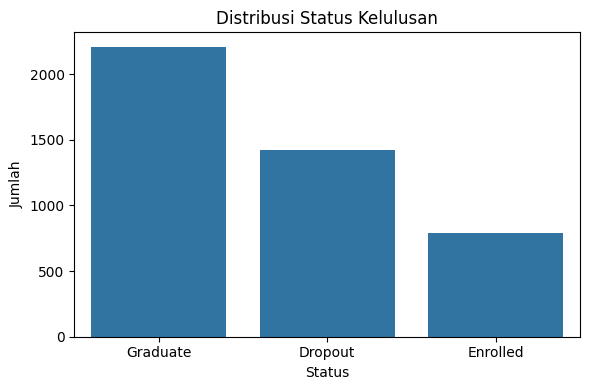

In [8]:
status_counts = dataset['Status'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=status_counts.index, y=status_counts.values)

plt.title('Distribusi Status Kelulusan')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

**Insight:**  
Status Graduate merupakan kelas dominan yang berarti jumlah siswa lulus lebih banyak dibandingkan dropout. Grafik tersebut juga menunjukkan distribusi antarkelas tidak seimbanga (imbalanced) yang dapat memengaruhi hasil model dalam memprediksi status siswa.

### Korelasi Fitur Numerik

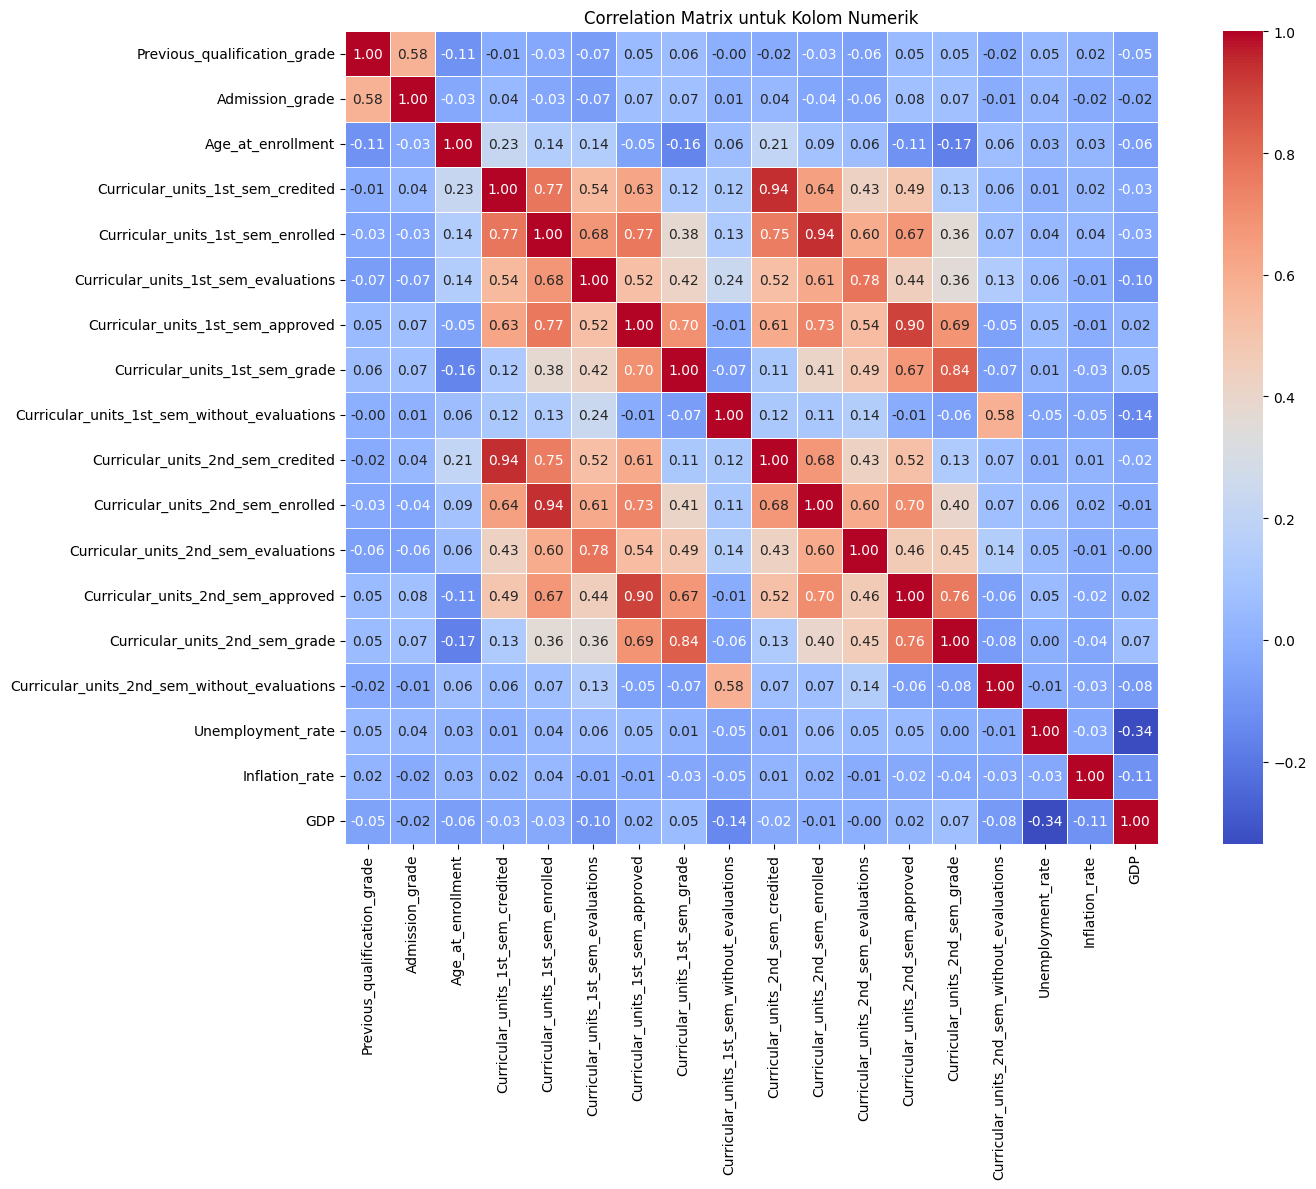

In [9]:
numerik_df = dataset[numerical_features]
corr_matrix = numerik_df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)

plt.title('Correlation Matrix untuk Kolom Numerik')
plt.tight_layout()
plt.show()

**Insight:**
- Fitur `curricular_units_enrolled` memiliki korelasi yang sangat kuat pada `1st_sem` dan `2nd_sem`.
- Fitur `Curricular_units_approved` memiliki korelasi yang kuat pada `1st_sem` dan `2nd_sem`.
- Kondisi tersebut mengindikasikan adanya pola yang sama untuk curricular units pada semester pertama dan kedua. Fitur dengan korelasi sangat kuat harus dihilangkan salah satunya karena dapat menyebabkan overfitting pada model akibat multikolinieritas.

#### Histogram Fitur Numerik

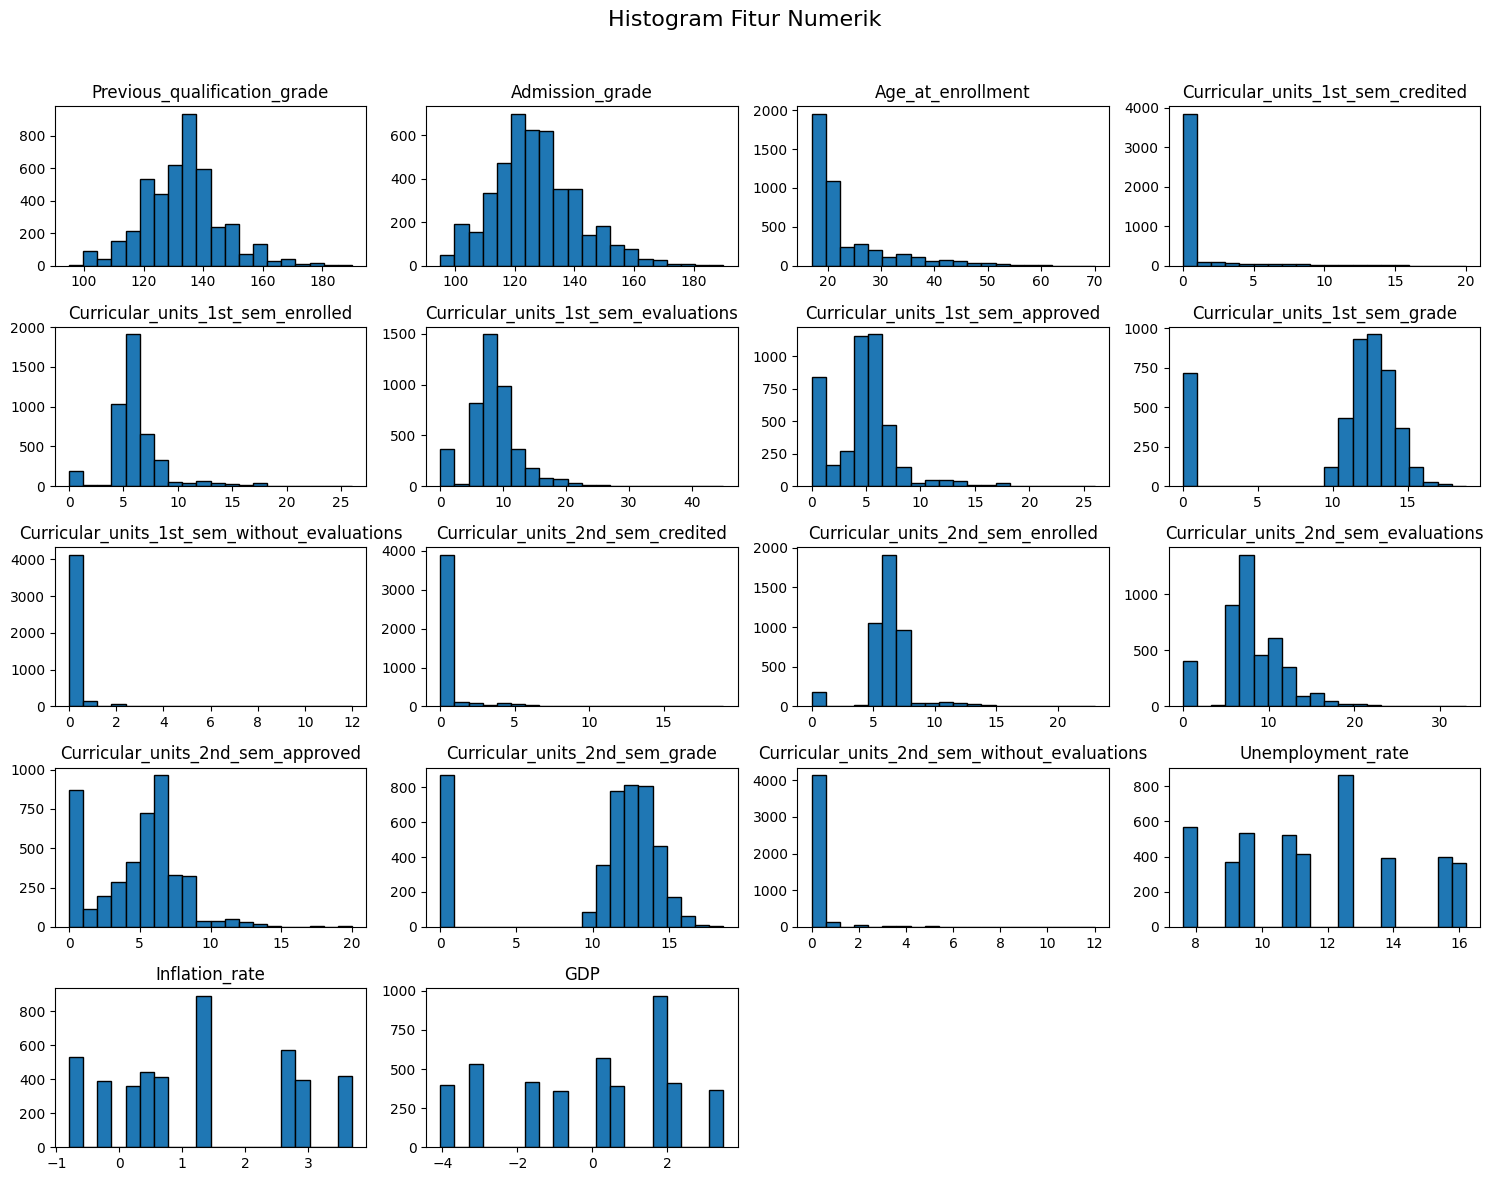

In [10]:
numerik_df = dataset[numerical_features]

# Plot histogram untuk tiap kolom numerik
numerik_df.hist(
    figsize=(15, 12),  # Ukuran keseluruhan grid
    bins=20,           # Jumlah bin di setiap histogram
    edgecolor='black',
    grid=False
)

plt.suptitle('Histogram Fitur Numerik', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Insight:**  
Histogram menunjukkan beberapa fitur numerik memiliki distribusi simetris dan beberapa fitur memiliki distribusi menceng kanan maupun kiri. Kondisi ini mengindikasikan data cukup menyebar dan tidak memusat di tengah.

#### Proporsi Status Kelulusan

In [11]:
colors = ['#78B3CE', '#C9E6F0', '#F96E2A']

def plot_stacked_status(feature, rotation=0):
    # Hitung jumlah per kombinasi feature dan status
    count_df = dataset.groupby([feature, 'Status']).size().unstack(fill_value=0)

    # Hitung proporsi tiap kelas status dalam setiap kategori
    prop_df = count_df.div(count_df.sum(axis=1), axis=0)

    # Plot stacked bar
    prop_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

    plt.title(f'Proporsi status berdasarkan {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proporsi')
    plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

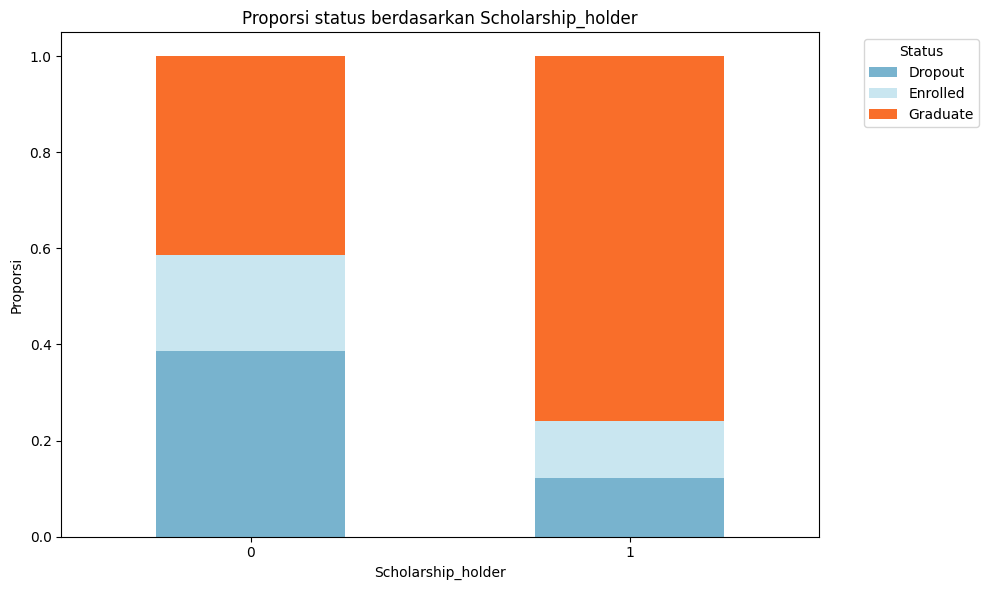

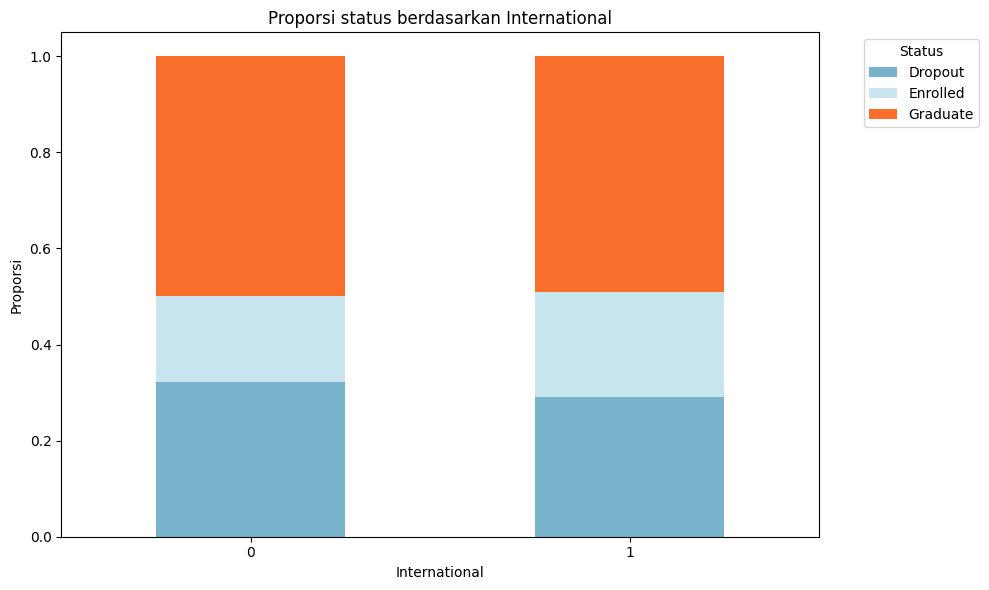

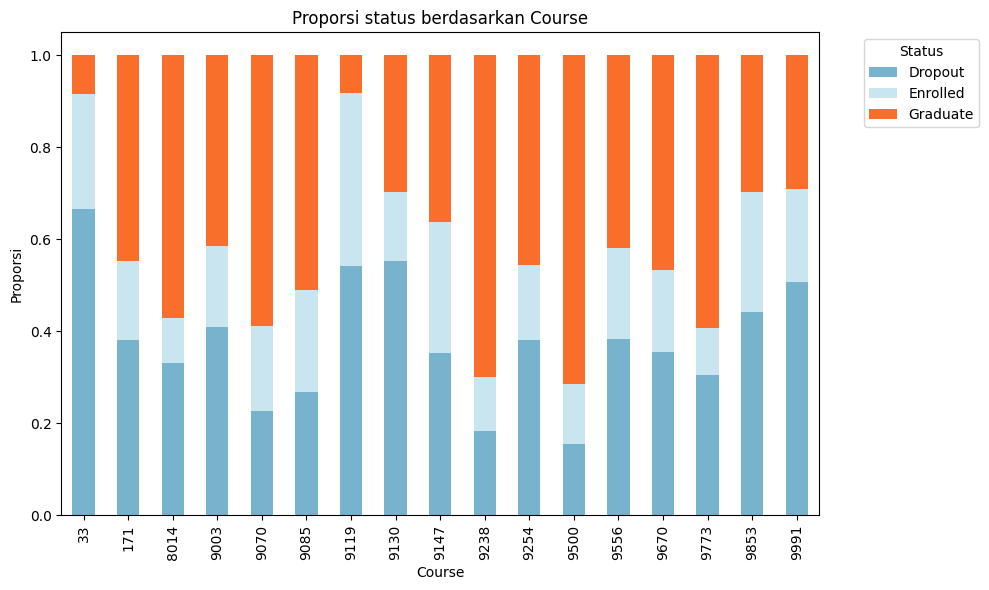

In [12]:
plot_stacked_status('Scholarship_holder')
plot_stacked_status('International')
plot_stacked_status('Course', rotation=90)

**Insight:**
- Berdasarkan `Scholarship_holder`, siswa yang tidak berstatus penerima beasiswa memiliki proporsi dropout yang lebih tinggi. Hal ini mengindikasikan pemberian beasiswa dapat memberikan motivasi belajar bagi siswa.
- Berdasarkan `International`, baik siswa internasional maupun lokal memiliki proporsi yang sama untuk dropout.
- Berdasarkan `Course`, siswa yang mengambil course Biofuel Production Technologies memiliki proporsi dropout yang paling tinggi sehingga course ini mencerminkan kesulitan yang tinggi dibandingkan course lainnya.

#### Boxplot

C:\Users\hp14s\AppData\Local\Temp\ipykernel_20552\2252191796.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=numerik_long, x='Fitur', y='Nilai', palette='Set2')


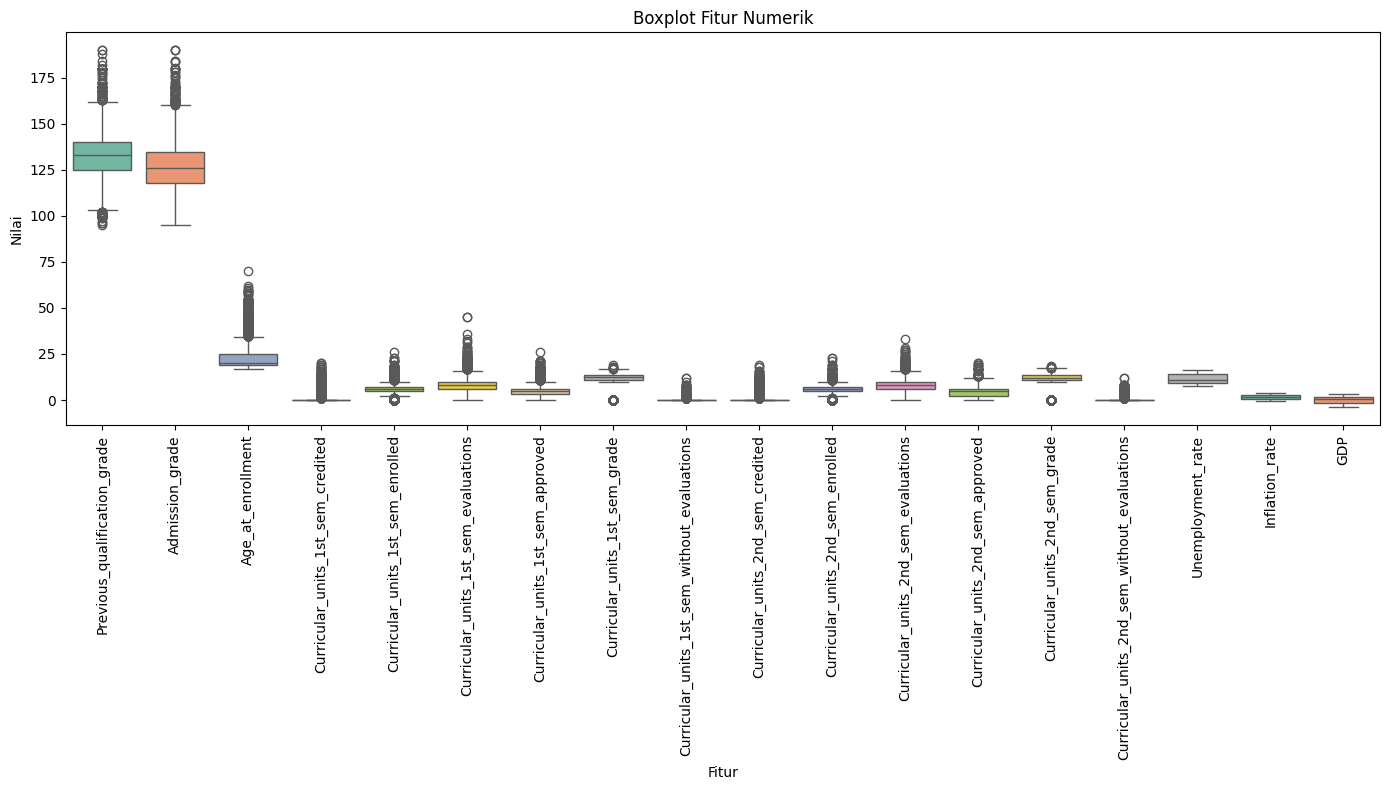

In [13]:
numerik_long = numerik_df.melt(var_name='Fitur', value_name='Nilai')

# Plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=numerik_long, x='Fitur', y='Nilai', palette='Set2')
plt.xticks(rotation=90)
plt.title('Boxplot Fitur Numerik')
plt.tight_layout()
plt.show()

**Insight:**
- Boxplot makin memperjelas bahwa distribusi fitur numerik memiliki rentang yang berbeda pada beberapa fitur. Oleh karena itu, proses standardisasi data penting untuk dilakukan guna mengindari dominasi beberapa fitur.
- Boxplot menunjukkan bahwa terdapat banyak pencilan atas pada beberapa fitur sehingga perlu penanganan agar model yang dihasilkan dapat menggeneralisasi data.

## Data Preparation / Preprocessing

### Pemilihan Fitur Relevan
Dataset terdiri dari banyak fitur. Pada tahap data understanding menemukan bahwa beberapa fitur numerik memiliki korelasi yang sangat kuat satu sama lain. Oleh karena itu, fitur-fitur harus diseleksi untuk mengurangi kompleksitas model.

In [14]:
relevance = ["Application_mode", "Course", "Previous_qualification", "Previous_qualification_grade", "Mothers_occupation", "Admission_grade", "Debtor", "Tuition_fees_up_to_date", "Gender", "Scholarship_holder", "Age_at_enrollment", "Curricular_units_1st_sem_credited", "Curricular_units_2nd_sem_evaluations", "Curricular_units_2nd_sem_approved", "Unemployment_rate", "GDP", "Status"]
numerical_features = ["Previous_qualification_grade", "Admission_grade", "Age_at_enrollment", "Curricular_units_1st_sem_credited", "Curricular_units_2nd_sem_evaluations", "Curricular_units_2nd_sem_approved", "Unemployment_rate", "GDP"]

clean_df = dataset[relevance]
clean_df.head()

,Application_mode,Course,Previous_qualification,Previous_qualification_grade,Mothers_occupation,Admission_grade,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Unemployment_rate,GDP,Status
0,17,171,1,122.0,5,127.3,0,1,1,0,20,0,0,0,10.8,1.74,Dropout
1,15,9254,1,160.0,3,142.5,0,0,1,0,19,0,6,6,13.9,0.79,Graduate
2,1,9070,1,122.0,9,124.8,0,0,1,0,19,0,0,0,10.8,1.74,Dropout
3,17,9773,1,122.0,5,119.6,0,1,0,0,20,0,10,5,9.4,-3.12,Graduate
4,39,8014,1,100.0,9,141.5,0,1,0,0,45,0,6,6,13.9,0.79,Graduate


#### Pengecekan Korelasi Fitur Numerik

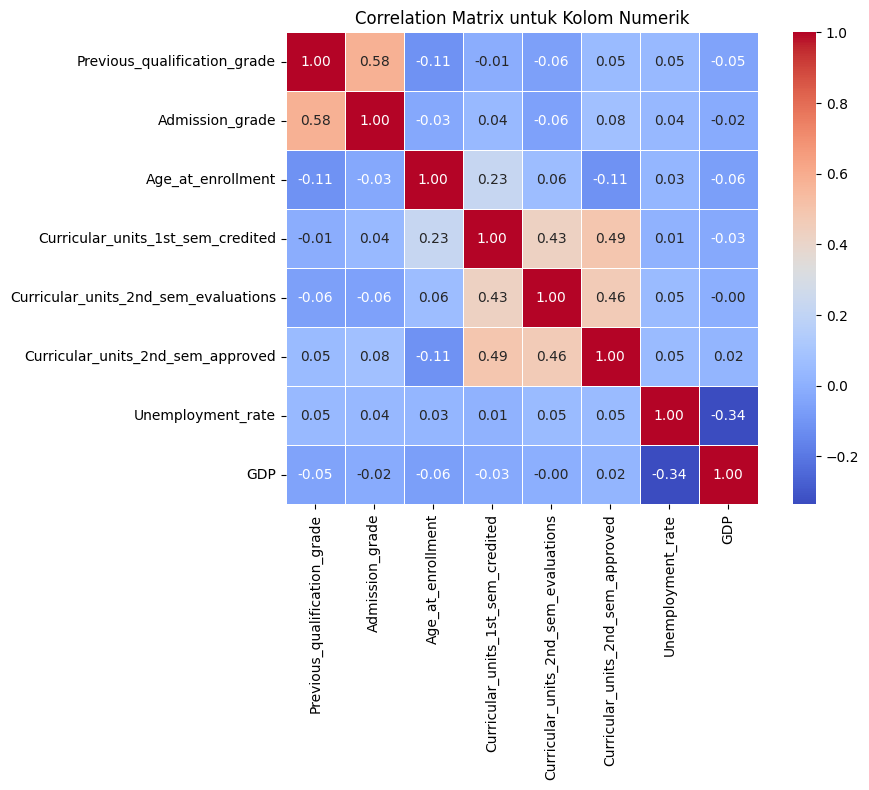

In [15]:
numerik_df = clean_df[numerical_features]
corr_matrix = numerik_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)

plt.title('Correlation Matrix untuk Kolom Numerik')
plt.tight_layout()
plt.show()

**Insight:**  
Setelah menyeleksi fitur-fitur relevan, fitur numerik yang digunakan saat ini sudah tidak ada yang memiliki korelasi sangat kuat.

### Mengubah Tipe Data Fitur Kategorik

In [16]:
categorical_features = list(set(relevance) - set(numerical_features) - {"Status"})

for col in categorical_features:
    clean_df[col] = clean_df[col].astype('category')

C:\Users\hp14s\AppData\Local\Temp\ipykernel_20552\2329130734.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[col] = clean_df[col].astype('category')


In [17]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Application_mode                      4424 non-null   category
 1   Course                                4424 non-null   category
 2   Previous_qualification                4424 non-null   category
 3   Previous_qualification_grade          4424 non-null   float64 
 4   Mothers_occupation                    4424 non-null   category
 5   Admission_grade                       4424 non-null   float64 
 6   Debtor                                4424 non-null   category
 7   Tuition_fees_up_to_date               4424 non-null   category
 8   Gender                                4424 non-null   category
 9   Scholarship_holder                    4424 non-null   category
 10  Age_at_enrollment                     4424 non-null   int64   
 11  Curr

**Insight:**  
Setelah mengubah tipe data, fitur kategorik kini memiliki Dtype sebagai category. Tujuan langkah ini adalah untuk menghindari model untuk menginterpretasikan angka yang bukan numerik.

### Encoding Fitur Kategorik

In [18]:
status_encoder = LabelEncoder()
clean_df["Status"] = status_encoder.fit_transform(clean_df["Status"])

C:\Users\hp14s\AppData\Local\Temp\ipykernel_20552\1601730063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["Status"] = status_encoder.fit_transform(clean_df["Status"])


**Insight:**  
Fitur kategorik yang masih berupa string, yaitu `Status`, telah dilakukan encoding ke bentuk numerik.

### Menghapus Outlier
Berdasarkan boxplot fitur numerik, dataset memiliki banyak outlier. Oleh karena itu, outlier tersebut harus dihilangkan agar tidak merusak performa model.

In [19]:
Q1 = clean_df[numerical_features].quantile(0.25)
Q3 = clean_df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Simpan baris yang semua fitur numeriknya berada dalam [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
mask = ~((clean_df[numerical_features] < (Q1 - 1.5 * IQR)) | 
         (clean_df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)

clean_df = clean_df[mask]

**Insight:**  
Outlier yang ada pada dataset sudah dihapus.

### Data Splitting

In [20]:
X = clean_df.drop(columns="Status")
Y = clean_df[["Status"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
print(f"Dimensi X_train: {X_train.shape}")
print(f"Dimensi Y_train: {Y_train.shape}")
print(f"Dimensi X_test: {X_test.shape}")
print(f"Dimensi X_test: {X_test.shape}")

Dimensi X_train: (2680, 16)
Dimensi Y_train: (2680, 1)
Dimensi X_test: (671, 16)
Dimensi X_test: (671, 16)


**Insight:**  
Dataset telah dibagi menjadi data training dan testing dengan proporsi 80/20.

### Standardisasi Fitur Numerik

In [22]:
# Inisiasi scaler
scaler = StandardScaler()
X_train_temp = X_train.copy()

# Fit dan transform data training
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_temp[numerical_features]),
    columns=numerical_features,
    index=X_train_temp.index
)
X_train_cat = X_train_temp[categorical_features]
X_train = pd.concat([X_train_scaled, X_train_cat], axis=1)

In [23]:
# Transform fitur numerik test
X_test_num_scaled = pd.DataFrame(
    scaler.transform(X_test[numerical_features]),
    columns=numerical_features,
    index=X_test.index
)

# Ambil fitur kategorik test
X_test_cat = X_test[categorical_features].reset_index(drop=True)

# Gabungkan kembali test
X_test = pd.concat([X_test_num_scaled.reset_index(drop=True), X_test_cat], axis=1)

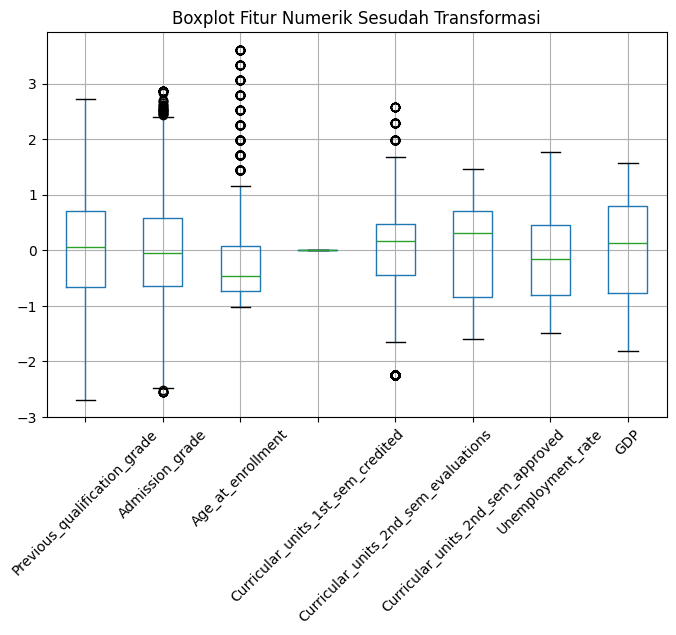

In [24]:
plt.figure(figsize=(8, 5))
X_train[numerical_features].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot Fitur Numerik Sesudah Transformasi")
plt.show()

**Insight:**  
Setelah dilakukan standardisasi data, semua fitur numerik kini telah memiliki besaran yang seragam dan tidak ada yang mendominasi. Boxplot kini terlihat memiliki lebih sedikit pencilan setelah outlier dihapus dari dataset.

### Penerapan SMOTE
Kelas pada dataset tidak memiliki distribusi yang seimbang (imbalanced) sehingga teknik oversampling perlu diterapkan untuk meningkatkan performa model. Proyek ini menerapkan SMOTE untuk menangani imbalanced class.

In [25]:
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_features]
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_train, Y_train = smote_nc.fit_resample(X_train, Y_train)

c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


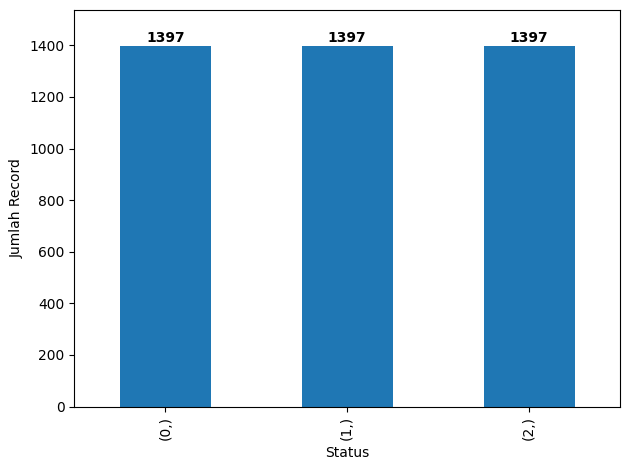

In [26]:
# Hitung jumlah masing-masing kelas
value_counts = Y_train.value_counts()

# Plot bar chart
ax = value_counts.plot(kind='bar',)
plt.xlabel('Status')
plt.ylabel('Jumlah Record')
plt.ylim(0, value_counts.max() * 1.1)

# Tambahkan label masing-masing kelas
for i, v in enumerate(value_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

**Insight:**  
Penerapan SMOTE telah menyeimbangkan jumlah record pada masing-masing kelas dalam dataset. Oleh karena itu, dataset sudah bisa digunakan untuk modeling.

## Modeling

### 1. Random Forest

In [27]:
rf = RandomForestClassifier(random_state=42)

#### Hyperparameter Tuning

In [28]:
param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [29]:
random_search_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CC1C786370>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CC1C8B4D30>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CC1C5403A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CC1C328EE0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [30]:
best_rf = random_search_rf.best_estimator_
print("Best parameters:", random_search_rf.best_params_)

Best parameters: {'bootstrap': False, 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 152}


In [31]:
best_rf.fit(X_train, Y_train)

c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=152, random_state=42)

#### Penerapan 5-Cross Validation

In [32]:
rf_scores = cross_val_score(best_rf, X_train, Y_train, cv=5, scoring='accuracy')

c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

In [33]:
print("Akurasi per fold:", rf_scores)
print("Rata-rata akurasi:", rf_scores.mean())

Akurasi per fold: [0.73897497 0.77326969 0.84844869 0.89140811 0.86038186]
Rata-rata akurasi: 0.8224966646849158


**Insight:**  
Model random forest memiliki akurasi sebesar 0,82 pada 5-cross validation. Hasil ini menunjukkan model sudah cukup baik dalam memprediksi status kelulusan siswa.

### 2. KNN

In [34]:
knn = KNeighborsClassifier()

#### Hyperparameter Tuning

In [35]:
param_dist_knn = {
    'n_neighbors': randint(3, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

random_search_knn = RandomizedSearchCV(
    knn,
    param_distributions=param_dist_knn,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42
)

In [36]:
random_search_knn.fit(X_train, Y_train)

c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array 

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CC1C777640>,
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [37]:
best_knn = random_search_knn.best_estimator_
print("Best parameters:", random_search_knn.best_params_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [38]:
best_knn.fit(X_train, Y_train)

c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

#### Penerapan 5-Cross Validation

In [39]:
knn_scores = cross_val_score(best_knn, X_train, Y_train, cv=5, scoring='accuracy')

c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array 

In [40]:
print("Akurasi per fold:", knn_scores)
print("Rata-rata akurasi:", knn_scores.mean())

Akurasi per fold: [0.63289631 0.64319809 0.72434368 0.80310263 0.81264916]
Rata-rata akurasi: 0.7232379722422136


**Insight:**  
Hasil 5-cross validation menunjukkan model KNN memiliki akurasi sebesar 0,72. Hal ini bermakna bahwa KNN masih kurang baik dalam memprediksi status kelulusan siswa.

## Evaluation

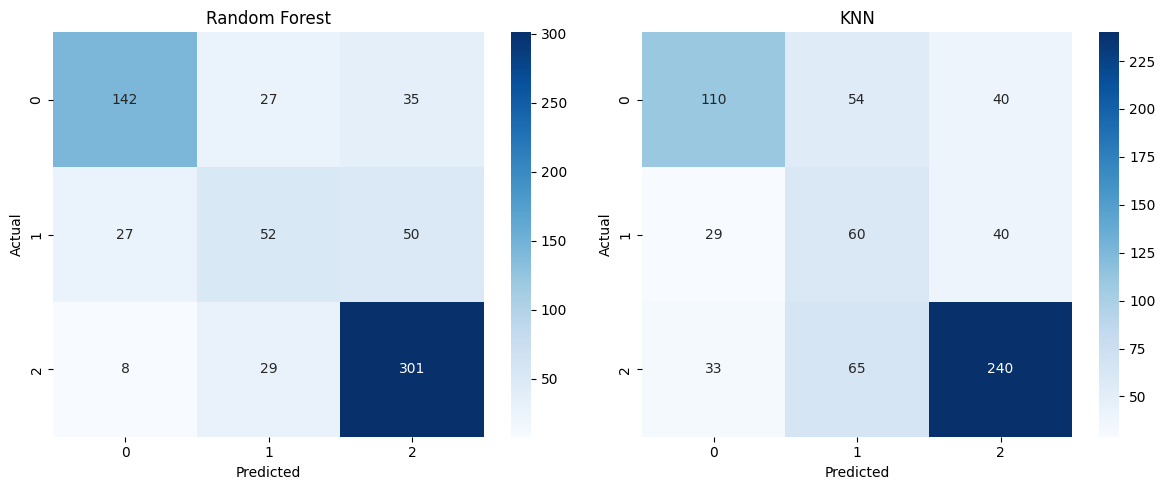

In [41]:
def plot_confusion_matrices(models, names, X_test, Y_test):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes = axes.flatten()

    for i, (model, name) in enumerate(zip(models, names)):
        Y_pred = model.predict(X_test)
        cm = confusion_matrix(Y_test, Y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(name)
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

models = [best_rf, best_knn]
names = [
    "Random Forest",
    "KNN"
]

# Panggil fungsi
plot_confusion_matrices(models, names, X_test, Y_test)

**Insight:**  
Confusion matrix menunjukkan bahwa model random forest lebih baik dalam memprediksi status dengan label 0 dan 2, sedangkan model KNN lebih baik dalam memprediksi status dengan label 1.

In [42]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(Y_test, Y_pred),
        'Precision': precision_score(Y_test, Y_pred, average="weighted"),
        'Recall': recall_score(Y_test, Y_pred, average="weighted"),
        'F1-Score': f1_score(Y_test, Y_pred, average="weighted")
    }
    return results
 
# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'Random Forest': evaluate_model(best_rf, X_test, Y_test),
    'KNN': evaluate_model(best_knn, X_test, Y_test)
}
 
# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
 
# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })
 
# Convert ke DataFrame
summary_df = pd.DataFrame(rows)
 
# Tampilkan DataFrame
print(summary_df)

           Model  Accuracy  Precision    Recall  F1-Score
0  Random Forest  0.737705   0.729273  0.737705  0.729828
1            KNN  0.611028   0.636670  0.611028  0.620249


**Insight:**  
Berdasarkan semua metrik klasifikasi yang digunakan, model random forest memiliki nilai yang lebih tinggi dibandingkan KNN pada data testing. Model random forest memilliki akurasi sebesar 0,74 dan sudah baik berdasarkan pola dataset. Hal ini menandakan model random forest dalam mengklasifikasikan status kelulusan pada data yang tidak terlihat. Oleh karena itu, model random forest dipilih sebagai model terbaik pada proyek ini.

### Feature Importance

In [43]:
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Buat DataFrame
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance.to_excel("data/feature_importance.xlsx", index=False)

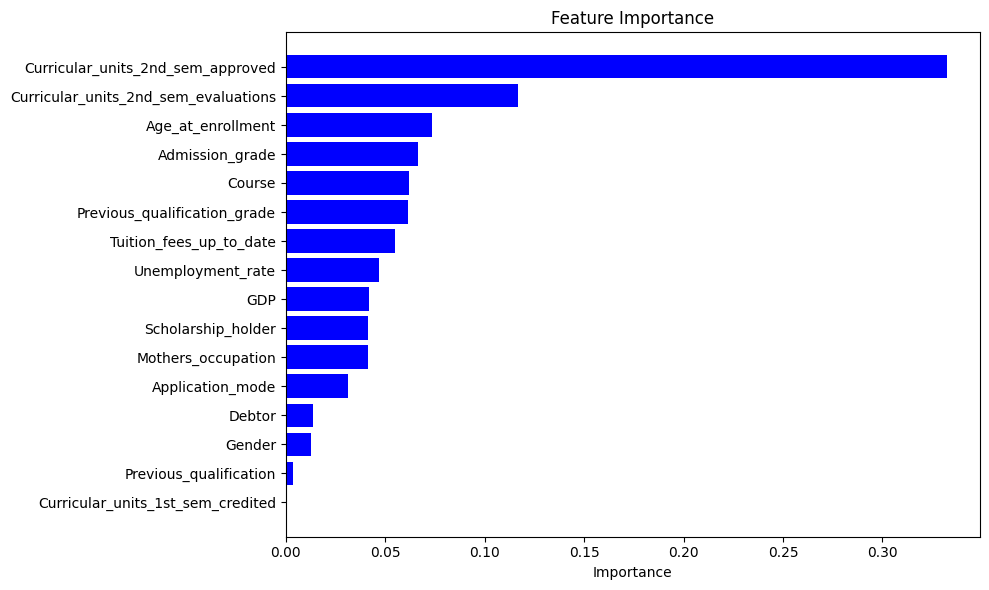

In [44]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='blue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Insight:**  
`Curricular_units_2nd_sem_approved` dan `Curricular_units_2nd_sem_evaluations` merupakan fitur dengan kontribusi paling tinggi terhadap status akademik siswa. Oleh karena itu, institusi dapat mempertimbangkan jumlah uni kurikulum yang tidak memberatkan siswa.

## Deployment
Untuk proses deployment, model yang telah dikembangkan harus disimpan dalam format joblib untuk diimplementasikan pada Streamlit.

In [48]:
# Status encoder
joblib.dump(status_encoder, "model/status_encoder.joblib")

# Scaler
joblib.dump(scaler, "model/scaler.joblib")

# Model random forest
joblib.dump(best_rf, "model/random_forest.joblib")

# Urutan kolom data training
joblib.dump(X_train.columns.to_list(), "model/feature_names.joblib")

['model/feature_names.joblib']

**Insight:**  
Semua model yang dibutuhkan telah disimpan dan siap digunakan untuk proses deployment.